In [1]:
from pylib.LabDataAnalysis.CircuitSolvers import *
from pylib.LabDataAnalysis.DataAnalysis import *
from pylib.LabDataAnalysis.ErrorCalculations import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

# Problem 5.3a

In [2]:
times = [10, 21, 101]
capacitor_ext = [4.7e-9, 10e-9, 47e-9]
R_g = np.mean(np.divide(times, capacitor_ext))
print(R_g)
C_g = 0.63/R_g
print(C_g)

2125531914.893617
2.963963963963964e-10


# Problem 4a

[0.01488, 0.0133, 0.01188, 0.01044, 0.00907, 0.00777, 0.00655, 0.00537, 0.00427, 0.00326, 0.00234, 0.001531, 0.000873, 0.000391, 0.000111, 1.5e-05, 1e-06]
[ 0.  -0.1 -0.2 -0.3 -0.4 -0.5 -0.6 -0.7 -0.8 -0.9 -1.  -1.1 -1.2 -1.3
 -1.4 -1.5 -1.6]


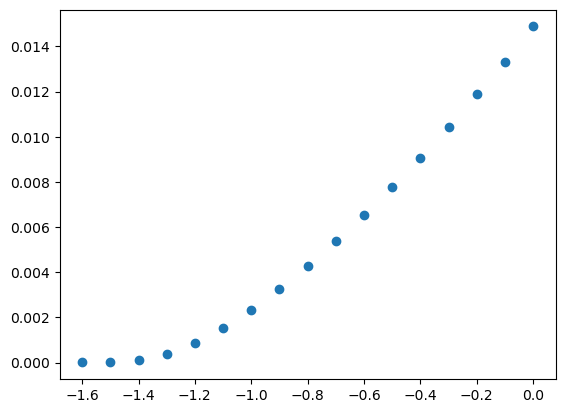

In [13]:
currents = [14.88e-3, 13.3e-3, 11.88e-3, 10.44e-3, 9.07e-3, 7.77e-3, 6.55e-3, 5.37e-3, 4.27e-3, 3.26e-3, 2.34e-3, 1.531e-3, 0.873e-3, 0.391e-3, 0.111e-3, 0.015e-3, 1e-6]
gate_voltage = np.arange(0.0, -1.7, -0.1)
print(currents)
print(gate_voltage)
plt.scatter(gate_voltage, currents)

-1.6711824757832774 +/- 0.021995381975067767, 0.015260811575794144+/-0.00015256785551035734


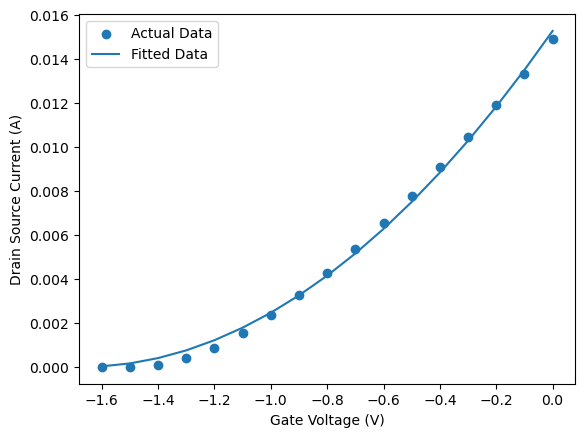

In [16]:
def current_jfet(v_gs, v_p, i_dss):
    return np.multiply(i_dss,np.square(1 - np.divide(v_gs,v_p)))

(V_p, I_dss), cov = opt.curve_fit(current_jfet, xdata=gate_voltage, ydata=currents, p0=[-1, 0.01])
pred_current = current_jfet(gate_voltage, V_p, I_dss)
plt.scatter(gate_voltage, currents, label="Actual Data")
plt.plot(gate_voltage, pred_current, label="Fitted Data")
plt.legend()
plt.xlabel("Gate Voltage (V)")
plt.ylabel("Drain Source Current (A)")
print(f"{V_p} +/- {np.sqrt(cov[0][0])}, {I_dss}+/-{np.sqrt(cov[1][1])}")

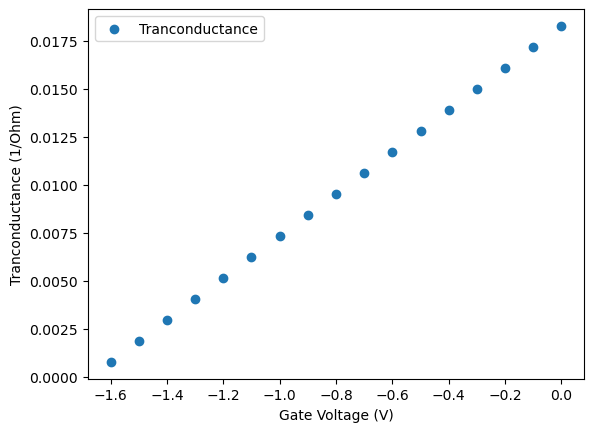

In [27]:
def g_m(v_gs, v_p, i_dss):
    return 2*i_dss*(1-v_gs/v_p)/(-v_p)
plt.scatter(gate_voltage, g_m(gate_voltage, V_p, I_dss), label="Tranconductance")
plt.xlabel("Gate Voltage (V)")
plt.ylabel("Tranconductance (1/Ohm)")
plt.legend()

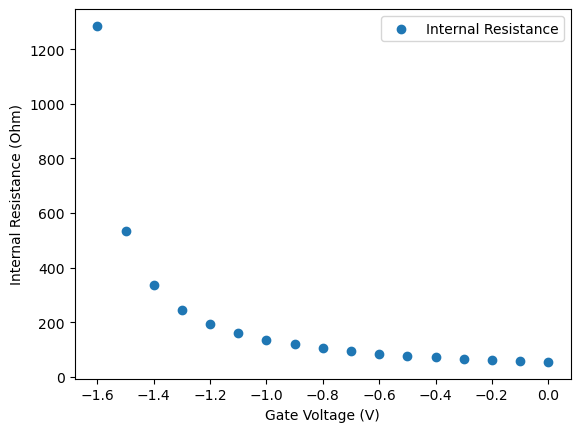

In [31]:
transconductance = g_m(gate_voltage, V_p, I_dss)
plt.scatter(gate_voltage, 1/transconductance, label="Internal Resistance")
plt.xlabel("Gate Voltage (V)")
plt.ylabel("Internal Resistance (Ohm)")
plt.legend()

Text(0, 0.5, 'Current Source Current (mA)')

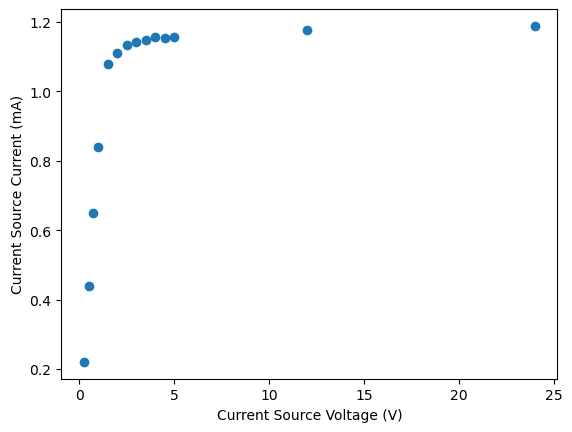

In [49]:
voltage = [0.25, 0.5,  0.75, 1,    1.5,  2,      2.5,   3,     3.5,   4,     4.5,   5, 12, 24]
current = [0.22, 0.44, 0.65, 0.84, 1.08, 1.1119, 1.134, 1.142, 1.147, 1.158, 1.155, 1.157, 1.176, 1.189]
plt.scatter(voltage, current, label="Current Source")
plt.xlabel("Current Source Voltage (V)")
plt.ylabel("Current Source Current (mA)")

2.53587115666178e-06 1.1453338213762811


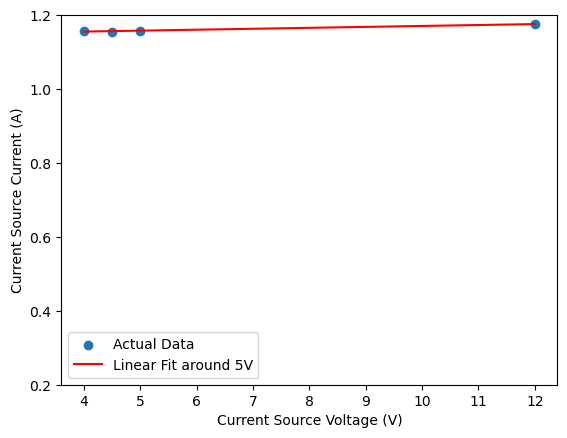

In [53]:
voltage = np.array(voltage) 
current = np.array(current)
m, b = simple_least_squares_linear(voltage[-5:-1], current[-5:-1])
plt.scatter(voltage[-5:-1], current[-5:-1], label="Actual Data")
plt.plot(voltage[-5:-1], m*voltage[-5:-1]+b, color='r', label="Linear Fit around 5V")
plt.xlabel("Current Source Voltage (V)")
plt.ylabel("Current Source Current (A)")
plt.ylim(0.2, 1.2)
plt.legend()
print(m*1e-3, b)

The closest points are:
For 2k, 0.0006619322885693659A and -1.323132313231323V
For 1k, 0.0012022391731826485A and -1.2021202120212022V
For 510, 0.002069919267256265A and -1.0557055705570557V


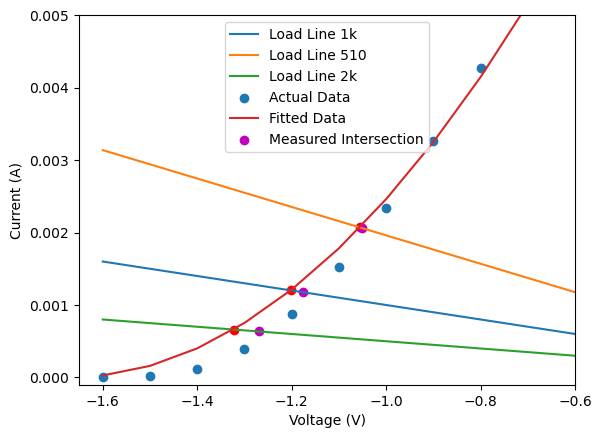

In [83]:
current_load = [2.06e-3, 1.176e-3, 0.635e-3]
resistance_load = [510, 1e3, 2e3]
voltage_load = np.multiply(current_load, resistance_load)
plt.plot(gate_voltage, -gate_voltage/1e3, label="Load Line 1k")
plt.plot(gate_voltage, -gate_voltage/510, label="Load Line 510")
plt.plot(gate_voltage, -gate_voltage/2e3, label="Load Line 2k")
plt.scatter(gate_voltage, currents, label="Actual Data")
plt.plot(gate_voltage, pred_current, label="Fitted Data")


voltage_dense = np.linspace(0, -2, 10000)
current_pred_dense = current_jfet(voltage_dense, V_p, I_dss)
current_1k = -voltage_dense/1e3
current_510 = -voltage_dense/510
current_2k = -voltage_dense/2e3
index_1k = np.argmin(np.abs(current_pred_dense - current_1k))
index_2k = np.argmin(np.abs(current_pred_dense - current_2k))
index_510 = np.argmin(np.abs(current_pred_dense - current_510))
print(f"The closest points are:")
print(f"For 2k, {current_pred_dense[index_2k]}A and {voltage_dense[index_2k]}V")
print(f"For 1k, {current_pred_dense[index_1k]}A and {voltage_dense[index_1k]}V")
print(f"For 510, {current_pred_dense[index_510]}A and {voltage_dense[index_510]}V")
plt.scatter(voltage_dense[index_1k], current_pred_dense[index_1k], color="r")
plt.scatter(voltage_dense[index_2k], current_pred_dense[index_2k], color="r")
plt.scatter(voltage_dense[index_510], current_pred_dense[index_510], color="r")
plt.scatter(-voltage_load, current_load, color='m', label="Measured Intersection")
plt.xlim(-1.65, -0.6)
plt.ylim(-0.0001, 0.005)
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.legend()

In [87]:
def percent_error(voltage): 
    return (voltage - 1.175)/1.175
print(percent_error(1.272))
print(percent_error(1.205))

0.08255319148936167
0.025531914893617044
